**I have used time series forecasting for stock market prediction analysis using the following models:**  
**1)LSTM**  
**2)ARIMA**  
**3)XGboost**  
**4)GAN**

**In this notebook I built LSTM and ARIMA models for time series forecasting of stock price predictions.**

**LSTM**

Importing the libraries and extracting the data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
# Set up End and Start times for data grab
#starting with the current year
#data would be extracted fr current_year-1 that is present year
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
#df.tail(10)
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2019-12-16,70.197502,69.245003,69.250000,69.964996,128186000.0,68.802635,APPLE
2019-12-17,70.442497,69.699997,69.892502,70.102501,114158400.0,68.937851,APPLE
2019-12-18,70.474998,69.779999,69.949997,69.934998,116028400.0,68.773132,APPLE
2019-12-19,70.294998,69.737503,69.875000,70.004997,98369200.0,68.841965,APPLE
2019-12-20,70.662498,69.639999,70.557503,69.860001,275978000.0,68.699387,APPLE
2019-12-23,71.062500,70.092499,70.132500,71.000000,98572000.0,69.820442,APPLE
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.886818,APPLE
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.273392,APPLE
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.246353,APPLE


Describing dataframe for Apple and Microsoft stocks

In [ ]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,93.987767,91.332342,92.629654,92.728720,1.450706e+08,92.171267
std,21.221176,20.639165,21.107238,20.908685,8.022610e+07,21.268620
min,57.125000,53.152500,57.020000,56.092499,2.019780e+07,55.291519
25%,75.809998,73.797501,74.315002,74.949997,9.682040e+07,73.704819
50%,88.692497,86.522499,87.852501,87.932503,1.295540e+08,87.623077
75%,116.087502,112.879997,114.720001,114.970001,1.830554e+08,114.771988
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [ ]:
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,192.591225,187.607233,190.099585,190.194071,3.739974e+07,189.178258
std,23.073051,23.405665,23.386252,23.263990,1.703303e+07,23.621896
min,140.570007,132.520004,137.009995,135.419998,8.989200e+06,134.366470
25%,173.570007,166.429993,169.710007,170.169998,2.568110e+07,168.488922
50%,196.490005,193.550003,194.000000,195.149994,3.265680e+07,194.171036
75%,213.289993,208.389999,210.949997,210.699997,4.387230e+07,210.429092
max,232.860001,227.350006,229.270004,231.649994,9.707360e+07,231.045105


Plot of closing stocks for companies.  
We can see an upward trend.

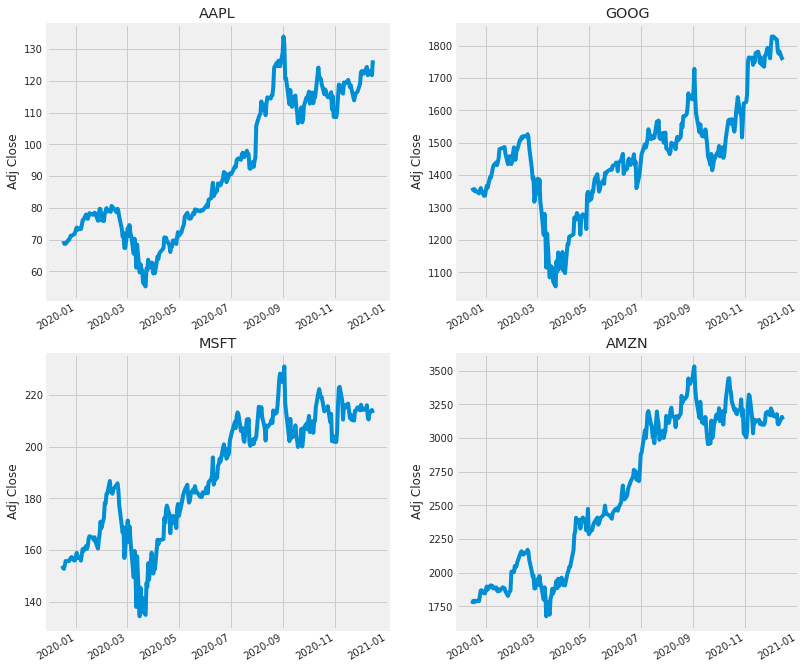

In [ ]:

# Let's see a historical view of the closing price


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")



Plot for the volume of stock being traded for each company

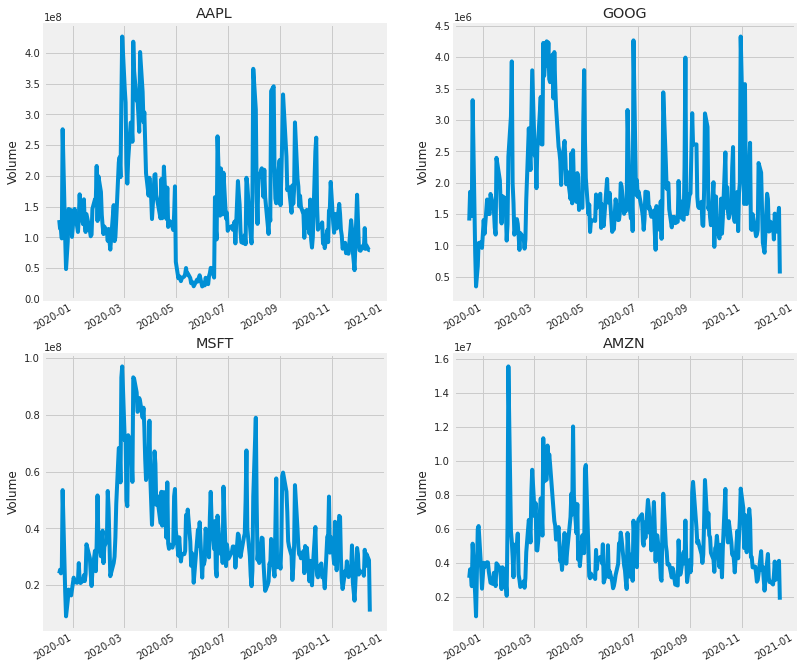

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

Calculating Moving Average

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
#g(ma).mean()

In [ ]:
print(AAPL.columns)
print(GOOG.columns)
print(MSFT.columns)
print(AMZN.columns)


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


Plot of Moving Average of stocks for companies for 10,20,30 days

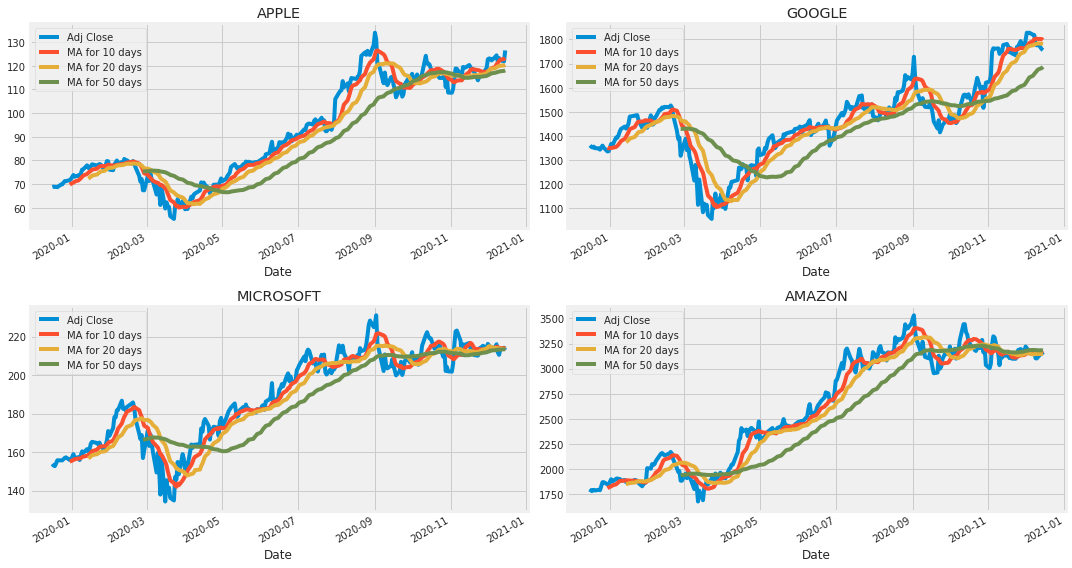

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Finding percentage change for each day as daily return

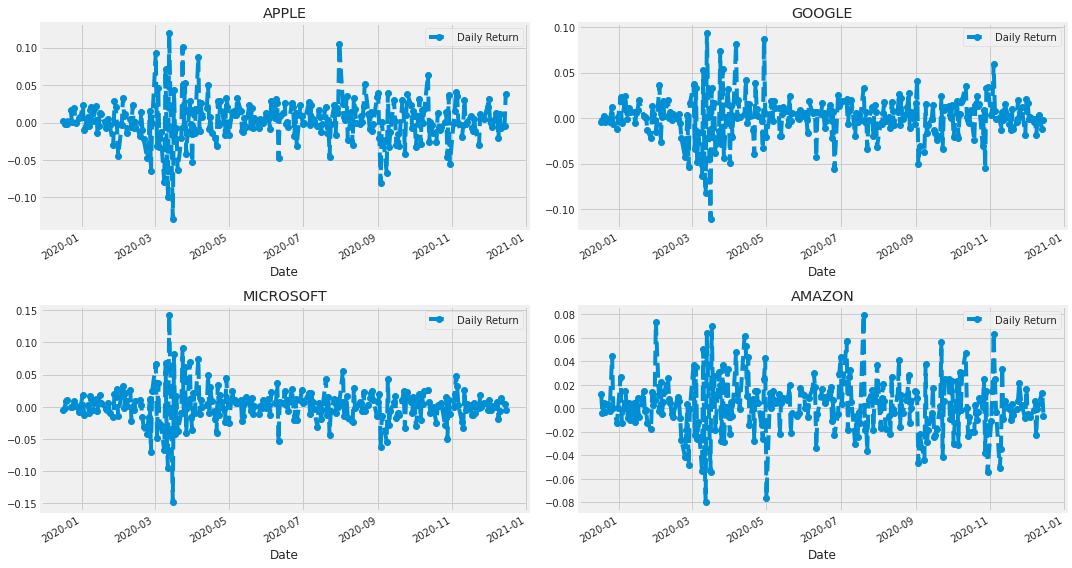

In [ ]:
 #We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Distribution plot of daily return

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

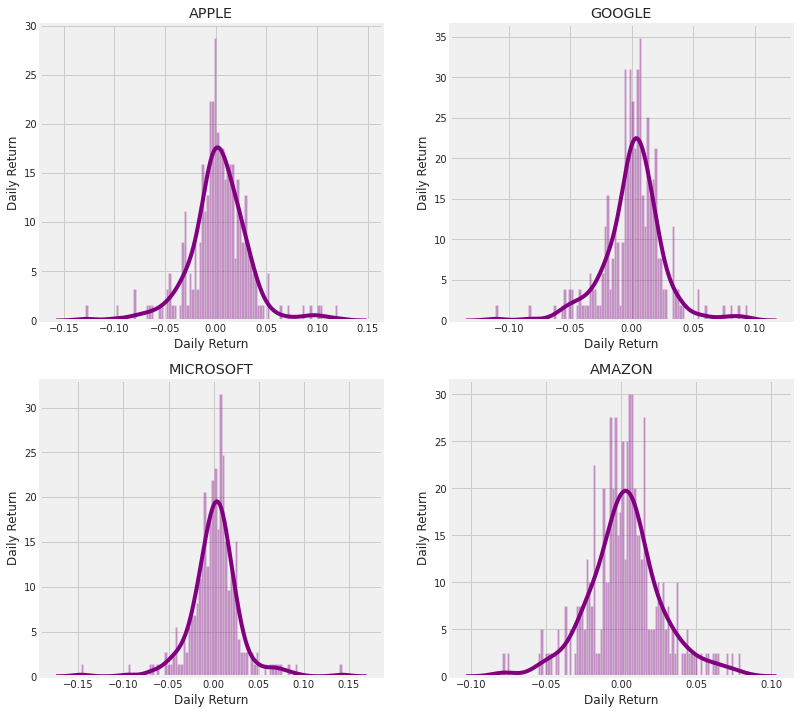

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-16,68.802635,1361.170044,153.899643,1769.209961
2019-12-17,68.937851,1355.119995,153.068451,1790.660034
2019-12-18,68.773132,1352.619995,152.751816,1784.030029
2019-12-19,68.841965,1356.040039,154.077759,1792.280029
2019-12-20,68.699387,1349.589966,155.759949,1786.500000


In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-16,NaN,NaN,NaN,NaN
2019-12-17,0.001965,-0.004445,-0.005401,0.012124
2019-12-18,-0.002389,-0.001845,-0.002069,-0.003703
2019-12-19,0.001001,0.002528,0.008680,0.004624
2019-12-20,-0.002071,-0.004757,0.010918,-0.003225


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



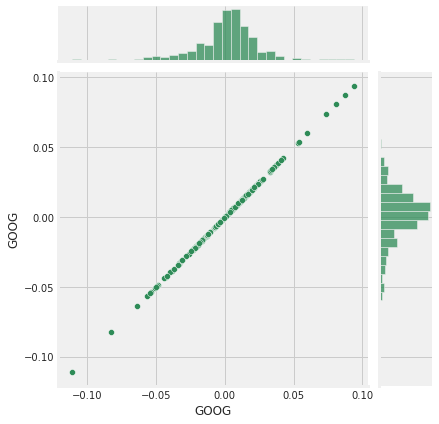

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



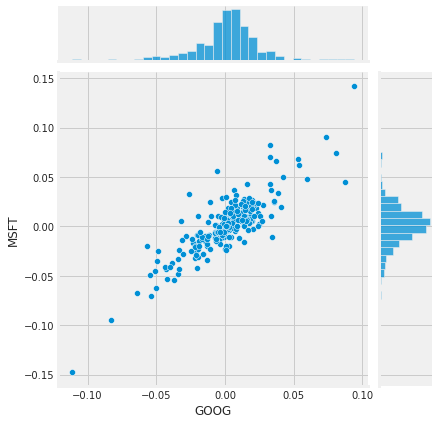

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

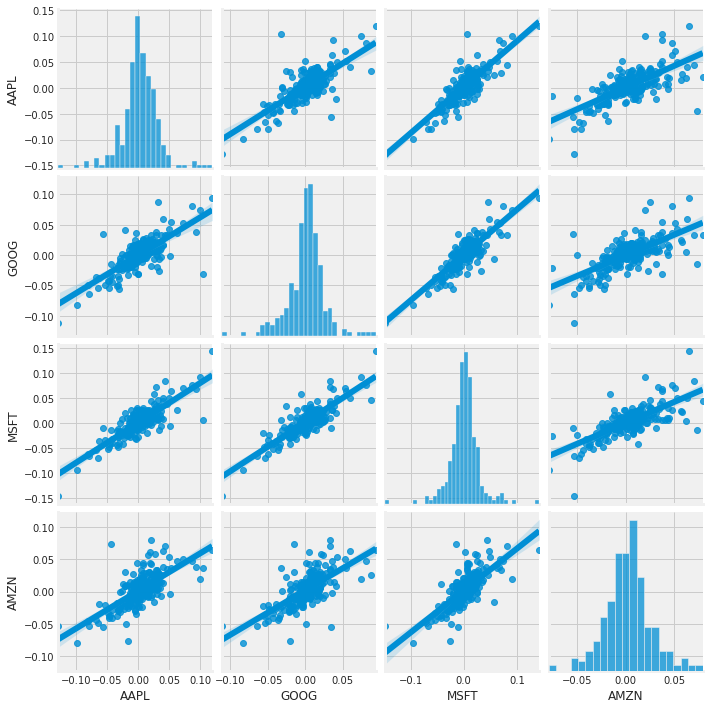

In [ ]:

sns.pairplot(tech_rets, kind='reg')

Plot for correlation among daily returns of various companies

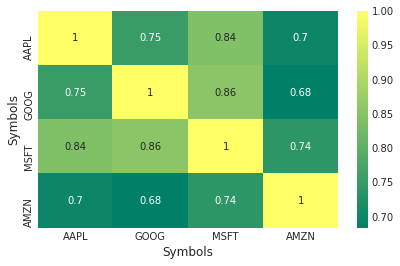

In [ ]:

# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')



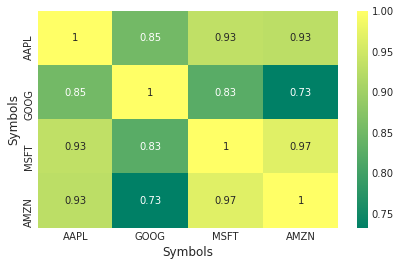

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')




Plot of Risk vs Expected Return

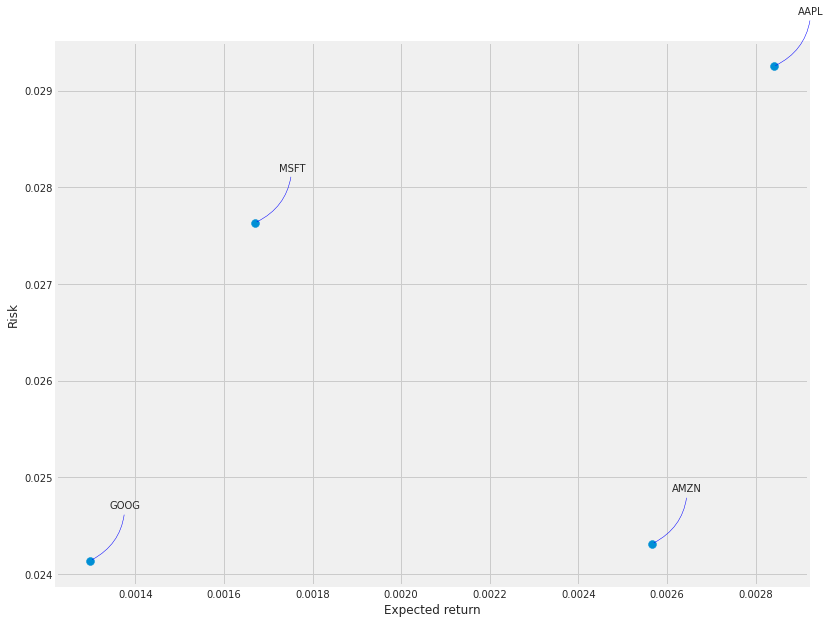

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

I have analysed stock market prediction for Microsoft

MICROSOFT

In [ ]:
#Get the stock quote
df1 = DataReader('MSFT', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show teh data
df1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.849474
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.363672
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.592201
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.943169
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.641172
...,...,...,...,...,...,...
2020-12-09,215.229996,211.210007,215.160004,211.800003,32440600.0,211.800003
2020-12-10,213.080002,210.360001,211.770004,210.520004,26733300.0,210.520004
2020-12-11,213.320007,209.110001,210.050003,213.259995,30979400.0,213.259995


In [ ]:
import random as rd
rd.seed()

Defining the training set

In [ ]:
#Create a new dataframe with only the 'Close column
data = df1.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len_g = int(np.ceil( len(dataset) * .8 ))

training_data_len_g

1804

Standardizing data using MinMaxScaler

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00194856],
       [0.00501753],
       [0.00638153],
       ...,
       [0.91041504],
       [0.91499417],
       [0.90905106]])

Reshaping the training data

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data_g = scaled_data[0:int(training_data_len_g), :]
#Split the data into x_train and y_train data sets
x_train_g = []
y_train_g = []

for i in range(60, len(train_data_g)):
    x_train_g.append(train_data_g[i-60:i, 0])
    y_train_g.append(train_data_g[i, 0])
    if i<= 61:
        print(x_train_g)
        print(y_train_g)
        
# Convert the x_train and y_train to numpy arrays 
x_train_g, y_train_g = np.array(x_train_g), np.array(y_train_g)

#Reshape the data
x_train_g = np.reshape(x_train_g, (x_train_g.shape[0], x_train_g.shape[1], 1))
# x_train.shap

[array([0.00194856, 0.00501753, 0.00638153, 0.00847623, 0.00667381,
       0.00716095, 0.00657638, 0.00794037, 0.00915822, 0.00920693,
       0.00906079, 0.00852494, 0.01627045, 0.01636788, 0.01446804,
       0.01553974, 0.01524746, 0.01393218, 0.01578332, 0.01539361,
       0.0171473 , 0.01743959, 0.01885229, 0.01865744, 0.01938815,
       0.02089828, 0.02143414, 0.02011886, 0.02050857, 0.01890101,
       0.01792673, 0.02396727, 0.02377241, 0.02469797, 0.02386984,
       0.02435698, 0.02489282, 0.02425955, 0.02679267, 0.02615939,
       0.02883866, 0.02781567, 0.02645167, 0.02528254, 0.02664653,
       0.02747466, 0.02737724, 0.02762081, 0.03068978, 0.03117693,
       0.03156663, 0.03034878, 0.02840023, 0.02737724, 0.02698753,
       0.02742595, 0.02747466, 0.03030008, 0.02995908, 0.02835151])]
[0.028010513869453108]
[array([0.00194856, 0.00501753, 0.00638153, 0.00847623, 0.00667381,
       0.00716095, 0.00657638, 0.00794037, 0.00915822, 0.00920693,
       0.00906079, 0.00852494, 0.01

1)Builiding LSTM Model  
2)Training and compliling the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model1 = Sequential()
model1.add(LSTM(50, return_sequences=True, input_shape= (x_train_g.shape[1], 1)))
model1.add(LSTM(50, return_sequences= False))
model1.add(Dense(25))
model1.add(Dense(1))

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')
print(model1.summary())
#Train the model
model1.fit(x_train_g, y_train_g, batch_size=1, epochs=3)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_14 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
1744/1744 [==============================] - 40s 23ms/step - loss: 2.6697e-04
Epoch 2/3
1744/1744 [==============================] - 39s 22ms/step - loss: 1.7203e-04
Epoch 3/3
1744/1744 [==============================] - 40s 23ms/ste

1)Defining test set  
2)Prediction on test set

In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data_g = scaled_data[training_data_len_g - 60: , :]
#Create the data sets x_test and y_test
x_test_g = []
y_test_g = dataset[training_data_len_g:, :]
for i in range(60, len(test_data_g)):
    x_test_g.append(test_data_g[i-60:i, 0])
    
# Convert the data to a numpy array
x_test_g = np.array(x_test_g)

# Reshape the data
x_test_g = np.reshape(x_test_g, (x_test_g.shape[0], x_test_g.shape[1], 1 ))

# Get the models predicted price values 
predictions_g = model1.predict(x_test_g)
predictions_g = scaler.inverse_transform(predictions_g)

# Get the root mean squared error (RMSE)
rmse_g = np.sqrt(np.mean(((predictions_g - y_test_g) ** 2)))
rmse_g

5.145807705755716

Plotting the predicted results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



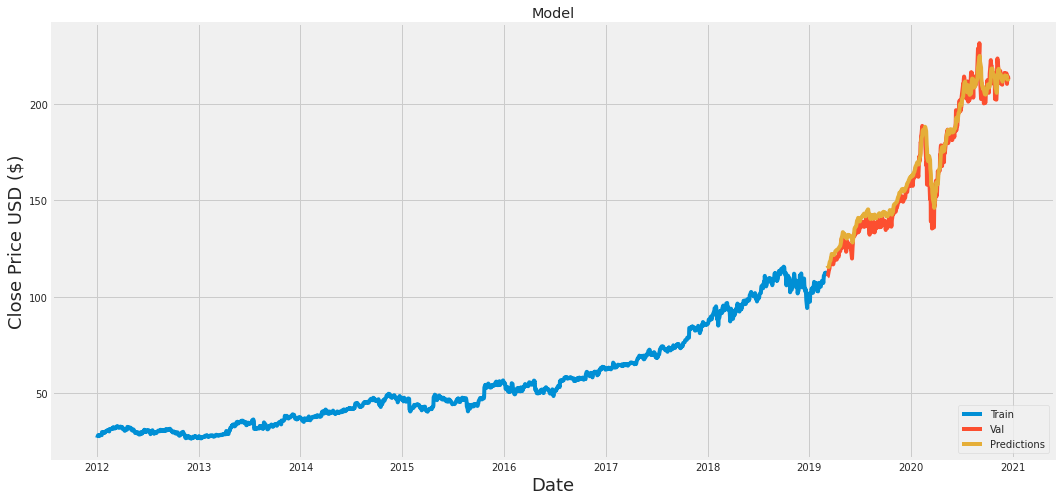

In [ ]:
# Plot the data
train = data[:training_data_len_g]
valid = data[training_data_len_g:]
valid['Predictions'] = predictions_g
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

As can be seen that LSTM model has performed very well on predicting the Closing Stock Price.The RMSE for predictions is 5.145807705755716 which is pretty good.

**ARIMA Models**

In [ ]:
!pip install pmdarima

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# import warnings
from google.colab import drive
from pandas import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller # for ADF Test
from statsmodels.tsa.arima_model import ARIMA # Our ARIMA Model here!
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot



     |████████████████████████████████| 1.5MB 9.0MB/s 
     |████████████████████████████████| 9.5MB 21.1MB/s 
     |████████████████████████████████| 2.1MB 50.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
#!pip uninstall statsmodels

In [ ]:
#!pip install numpy scipy patsy pandas

In [ ]:
#!pip install statsmodels

1)Extracting data for Microsoft stocks 


In [ ]:
df_new = pd.read_csv("/content/daily_MSFT.csv", usecols=["timestamp", "close"]).fillna(0)
df_new.timestamp = df_new.timestamp.values[::-1]
df_new.close = df_new.close.values[::-1]
df_new.head()



,timestamp,close
0,1998-01-02,131.13
1,1998-01-05,130.38
2,1998-01-06,131.13
3,1998-01-07,129.56
4,1998-01-08,130.50


In [ ]:
final_index = len(df_new) - 1
print(final_index)
df_new['timestamp'][final_index]

5283


'2019-01-02'

Plot of closing stock price of Microsoft

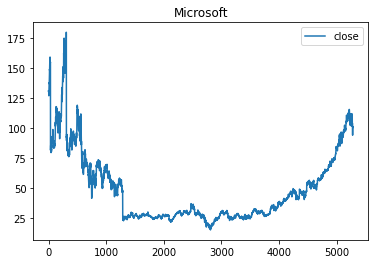

In [ ]:
df_new[['close']].plot()
plt.title("Microsoft")
plt.show()

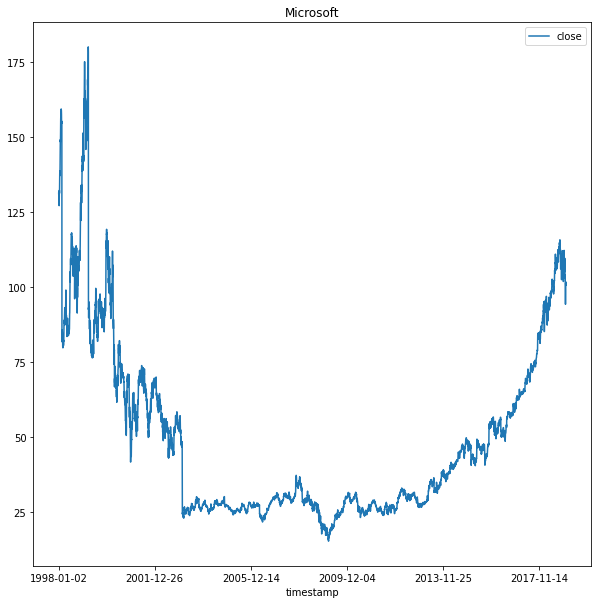

In [ ]:
df_new.plot(x='timestamp', y='close', figsize=(10, 10))
plt.title("Microsoft")
plt.show()

Checking for stationarity.  
There are 3 components on which ARIMA models are built on.   
Autoregressive model of order p  
Moving average model of order q  
Order of differencing d


Autoregressive Plot to determine order p

Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

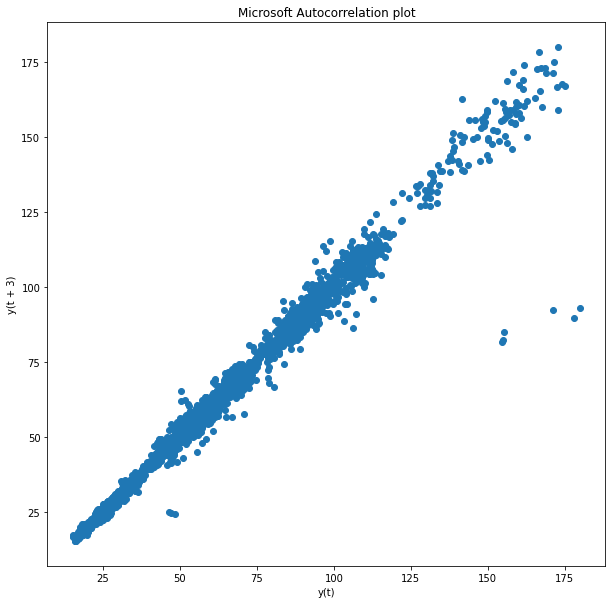

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(df_new['close'], lag=3)
plt.title('Microsoft Autocorrelation plot')

There seems to be perfect correlation between y(t) and y(t+3) which implies that they are highly correlated.Therefore order p for our model is 3

In [ ]:
df_diff = df_new.close.diff()

pmdarima module provides function auto_arima which finds AIC for different p,d,q combinations and the one with least AIC is chosen as p,d,q for our model

In [ ]:
import pmdarima as pmd
def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=5, 
                              start_q=0,
                              test="adf",
                              trace=True)
    return autoarima_model

In [ ]:
arima_model = arimamodel(df_new.close)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=22464.571, Time=1.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22471.453, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22472.781, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22472.741, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22469.495, Time=0.13 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=22464.047, Time=1.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=22463.858, Time=0.97 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=22470.641, Time=0.79 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22464.787, Time=2.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22469.667, Time=4.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=22464.293, Time=3.89 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=22461.907, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=22468.686, Time=0.34 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=22462.093, Time=0.54 sec
 ARIMA(3,1,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5284
Model:               SARIMAX(3, 1, 0)   Log Likelihood              -11226.953
Date:                Tue, 15 Dec 2020   AIC                          22461.907
Time:                        20:23:15   BIC                          22488.196
Sample:                             0   HQIC                         22471.095
                               - 5284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0127      0.016     -0.813      0.416      -0.043       0.018
ar.L2         -0.0284      0.006     -4.547      0.000      -0.041      -0.016
ar.L3         -0.0407      0.012     -3.363      0.001      -0.064      -0.017
sigma2         4.1055      0.005    760.327      0.000       4.095       4.116
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         189300908.94
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                           -23.47
Prob(H) (two-sided):                  0.00   Kurtosis:                       929.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Here we can see that best ARIMA model is with p,d,q as (3,1,0) respectively.

Plot of training and test data

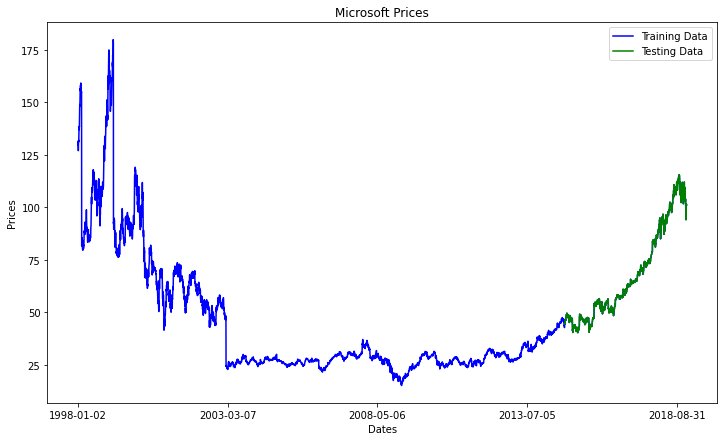

In [ ]:

train_data_ar, test_data_ar = df_new[0:int(len(df_new)*0.8)], df_new[int(len(df_new)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df_new['close'], 'blue', label='Training Data')
plt.plot(test_data_ar['close'], 'green', label='Testing Data')
plt.xticks(np.arange(0, final_index, 1300), df_new['timestamp'][0:final_index:1300])
plt.legend()



Validation metric function for ARIMA model

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_ar = train_data_ar['close'].values
test_ar = test_data_ar['close'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 1.187
Symmetric mean absolute percentage error: 33.719


In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 5282
Model:                 ARIMA(3, 1, 0)   Log Likelihood              -11225.282
Method:                       css-mle   S.D. of innovations              2.026
Date:                Tue, 15 Dec 2020   AIC                          22460.564
Time:                        20:25:17   BIC                          22493.424
Sample:                             1   HQIC                         22472.049
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0056      0.026     -0.217      0.828      -0.056       0.045
ar.L1.D.y     -0.0127      0.014     -0.925      0.355      -0.040       0.014
ar.L2.D.y     -0.0285      0.014     -2.072      0.0

In [ ]:
#residuals = pd.DataFrame(model_fit.resid)
#residuals.plot(title="Residuals")
#plt.show()

In [ ]:
#model_fit.plot_predict(dynamic=False) # False => use in-sample lag values
#plt.show()

Plot for predicted vs actual stock prices

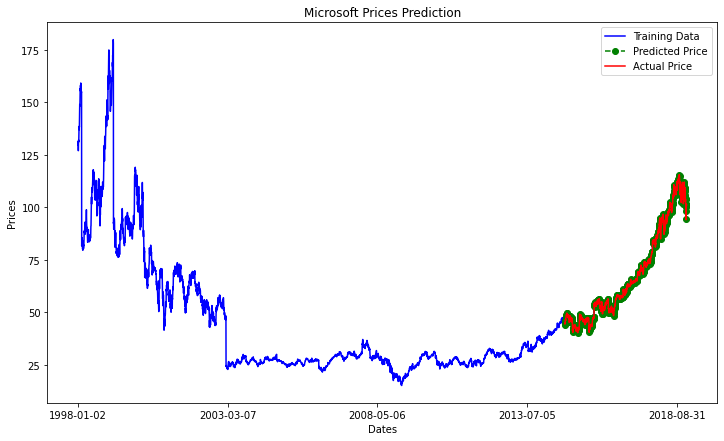

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df_new['close'], 'green', color='blue', label='Training Data')
plt.plot(test_data_ar.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data_ar.index, test_data_ar['close'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,final_index, 1300), df_new['timestamp'][0:final_index:1300])
plt.legend()

As we can see that ARIMA model performs very well on our stock data analysis.The simplicity of these ARIMA models makes them very much efficient and are widely used for statistical analysis.